###EDA and Elbow Method

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [18]:
input = pd.read_csv('/content/drive/MyDrive/plaksha/datax/lat_long.csv')
input

,Id,latitude,longitude
0,0,87.333294,144.484409
1,1,-22.605420,143.376342
2,2,-43.531545,-78.595627
3,3,-50.787744,-8.422739
4,4,-49.270064,-62.172244
...,...,...,...
249995,249995,61.696335,-115.325071
249996,249996,-62.290964,160.901633
249997,249997,-1.645343,27.326283
249998,249998,-62.363442,5.446562


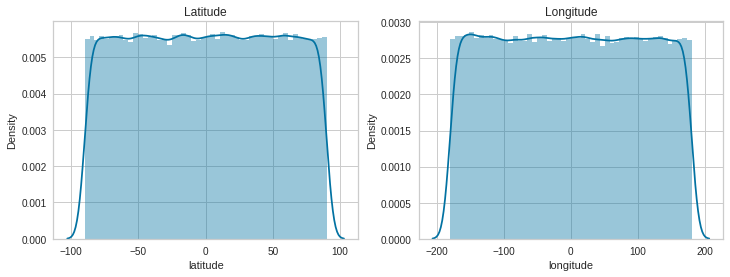

In [9]:
# plot distribution of latitude and longitude
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(input['latitude'], ax=ax[0])
ax[0].set_title('Latitude')
sns.distplot(input['longitude'], ax=ax[1])
ax[1].set_title('Longitude')
plt.show()

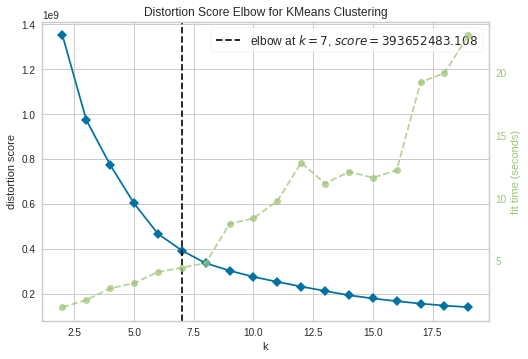

In [10]:
# elbow method to determine optimum value of k for kmeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(input.drop(['Id'], axis=1))     
visualizer.show()     

###Visualizing the Output

In [19]:
output = pd.read_csv('/content/drive/MyDrive/plaksha/datax/output.csv')
output

,latitude,longitude,cluster_number,centroid
0,45.69,92.55,4,0
1,-5.50,-113.16,6,0
2,61.70,-115.33,5,0
3,-62.29,160.90,1,0
4,-1.65,27.33,7,0
...,...,...,...,...
249949,33.81,-150.25,5,0
249950,0.39,40.16,7,0
249951,26.98,101.51,4,0
249952,-81.16,-7.73,3,0


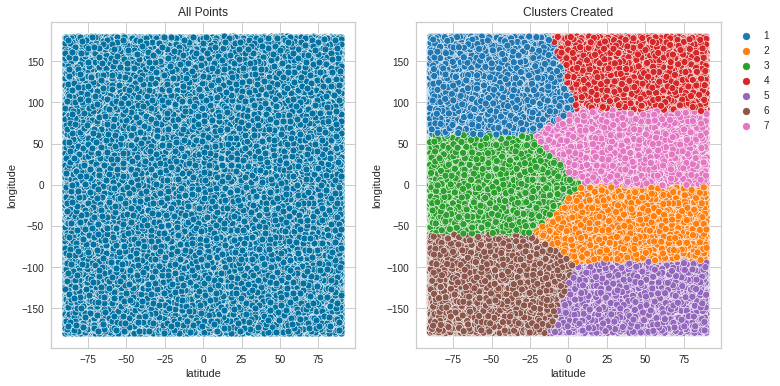

In [12]:
# plot the clusters created
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=output, x='latitude', y='longitude', ax=ax[0])
ax[0].set_title('All Points')
sns.scatterplot(data=output, x='latitude', y='longitude', hue='cluster_number', palette=sns.color_palette("tab10", 7), ax=ax[1])
ax[1].set_title('Clusters Created')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

In [13]:
# get centroids
centroids = output[output['centroid']==1]
centroids

,latitude,longitude,cluster_number,centroid
16629,43.24,-138.18,5,1
44489,-48.17,0.29,3,1
57487,-47.15,120.42,1,1
97790,-47.40,-120.32,6,1
112820,43.44,136.01,4,1
221924,40.84,44.87,7,1
245385,40.42,-48.79,2,1


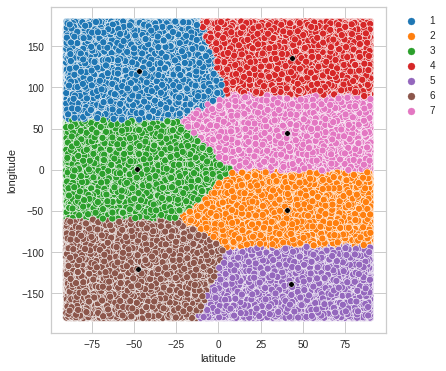

In [14]:
# plot clusters along with centroids
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=output, x='latitude', y='longitude', hue='cluster_number', palette=sns.color_palette("tab10", 7))
sns.scatterplot(data=centroids, x='latitude', y='longitude', color='black', marker='o', s=30)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

###Comparing Values of k

In [37]:
# read output files for other values of k
output_3 = pd.read_csv('/content/drive/MyDrive/plaksha/datax/output_3.csv')
output_5 = pd.read_csv('/content/drive/MyDrive/plaksha/datax/output_5.csv')
output_10 = pd.read_csv('/content/drive/MyDrive/plaksha/datax/output_10.csv')
output_15 = pd.read_csv('/content/drive/MyDrive/plaksha/datax/output_15.csv')
output_20 = pd.read_csv('/content/drive/MyDrive/plaksha/datax/output_20.csv')
centroids_3 = output_3[output_3['centroid']==1]
centroids_5 = output_5[output_5['centroid']==1]
centroids_10 = output_10[output_10['centroid']==1]
centroids_15 = output_15[output_15['centroid']==1]
centroids_20 = output_20[output_20['centroid']==1]

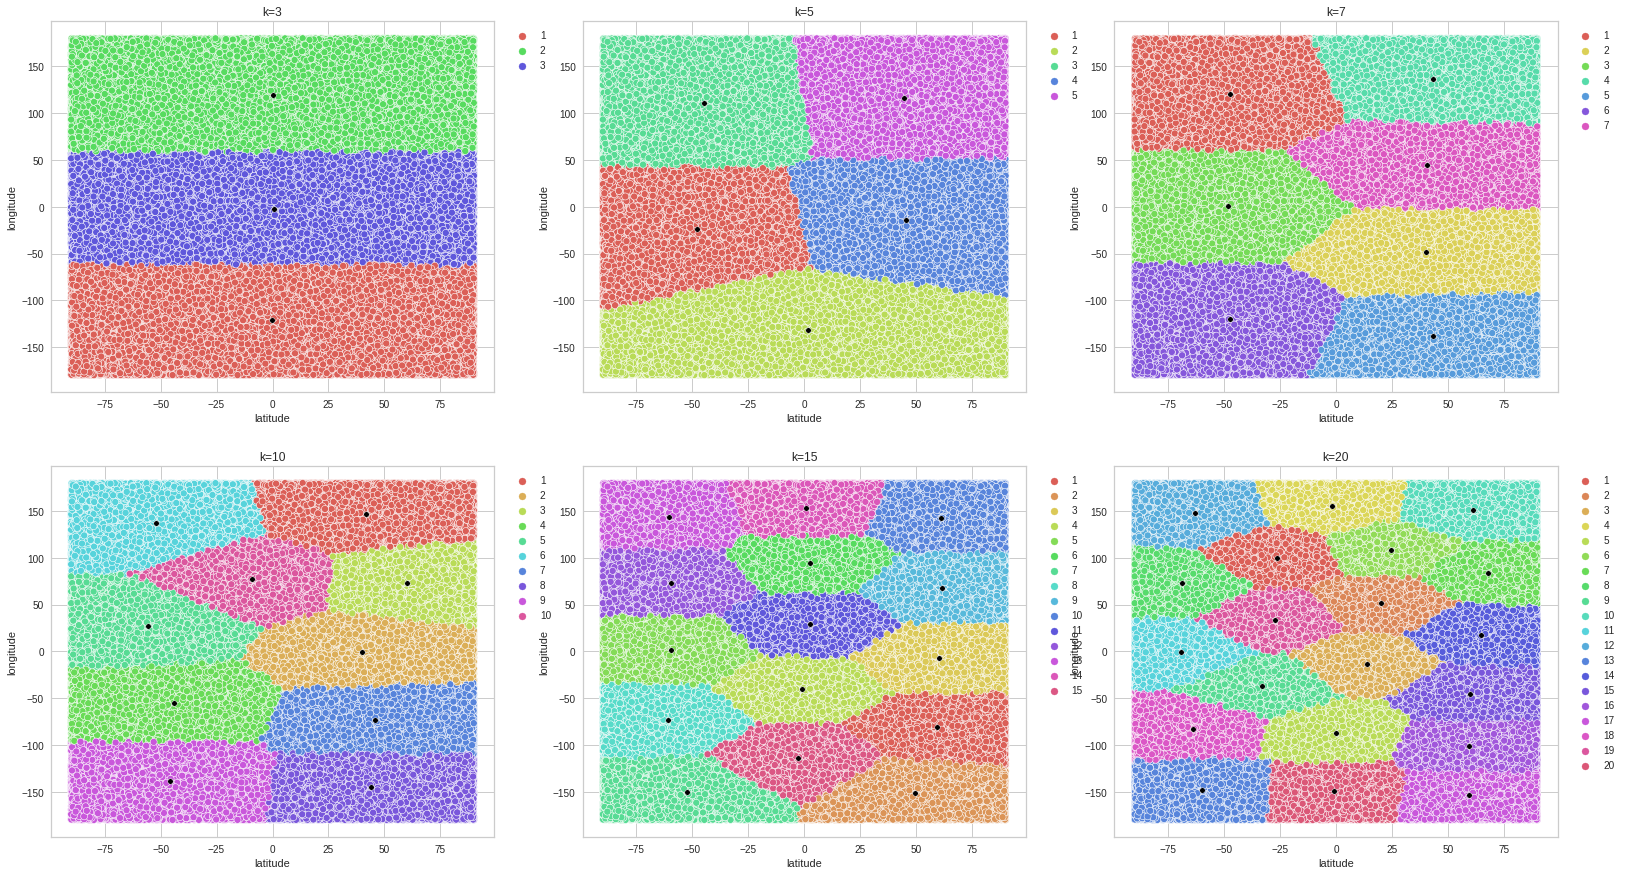

In [42]:
# compare outputs for varying values of k
fig, ax = plt.subplots(2, 3, figsize=(27,15))

sns.scatterplot(data=output_3, x='latitude', y='longitude', hue='cluster_number', palette=sns.color_palette("hls", 3), ax=ax[0][0])
sns.scatterplot(data=centroids_3, x='latitude', y='longitude', color='black', marker='o', s=30, ax=ax[0][0])
ax[0][0].legend(bbox_to_anchor=(1.02, 1), loc=2, )
ax[0][0].set_title('k=3')

sns.scatterplot(data=output_5, x='latitude', y='longitude', hue='cluster_number', palette=sns.color_palette("hls", 5), ax=ax[0][1])
sns.scatterplot(data=centroids_5, x='latitude', y='longitude', color='black', marker='o', s=30, ax=ax[0][1])
ax[0][1].legend(bbox_to_anchor=(1.02, 1), loc=2)
ax[0][1].set_title('k=5')

sns.scatterplot(data=output, x='latitude', y='longitude', hue='cluster_number', palette=sns.color_palette("hls", 7), ax=ax[0][2])
sns.scatterplot(data=centroids, x='latitude', y='longitude', color='black', marker='o', s=30, ax=ax[0][2])
ax[0][2].legend(bbox_to_anchor=(1.02, 1), loc=2)
ax[0][2].set_title('k=7')

sns.scatterplot(data=output_10, x='latitude', y='longitude', hue='cluster_number', palette=sns.color_palette("hls", 10), ax=ax[1][0])
sns.scatterplot(data=centroids_10, x='latitude', y='longitude', color='black', marker='o', s=30, ax=ax[1][0])
ax[1][0].legend(bbox_to_anchor=(1.02, 1), loc=2)
ax[1][0].set_title('k=10')

sns.scatterplot(data=output_15, x='latitude', y='longitude', hue='cluster_number', palette=sns.color_palette("hls", 15), ax=ax[1][1])
sns.scatterplot(data=centroids_15, x='latitude', y='longitude', color='black', marker='o', s=30, ax=ax[1][1])
ax[1][1].legend(bbox_to_anchor=(1.02, 1), loc=2)
ax[1][1].set_title('k=15')

sns.scatterplot(data=output_20, x='latitude', y='longitude', hue='cluster_number', palette=sns.color_palette("hls", 20), ax=ax[1][2])
sns.scatterplot(data=centroids_20, x='latitude', y='longitude', color='black', marker='o', s=30, ax=ax[1][2])
ax[1][2].legend(bbox_to_anchor=(1.02, 1), loc=2)
ax[1][2].set_title('k=20')

plt.show()